# Programa 1

Essa atividade busca estudar a implementação de método de RungeKutta para o problemade uma esfera sedimentando em um fluído viscoso.

Segue link do [repositório no github](https://github.com/igorsbs/metodos_numericos/tree/main)


Observação: Sei que a formatação, contextualização e discussão (nesse caso a ausência de discussão dos resultados) da atividade não estão boas, vou ajustar isso nos proximos dias - mesmo qe após a data de entrega. Peço desculpas pela qualidade, mas vou melhorar para a próxima entrega.

## Bibliotecas importadas na implementação

In [59]:
import matplotlib.pyplot as plt
import numpy as np

## Funções necessárias para a implementação

In [ ]:
def runge_kutta_4_ordem_st(func,x,y_init,step,st):

    """
    Método de Runge-Kutta de 4ª ordem para resolver EDO de esfera sedimentando para
    Reynolds = 0.

    Parâmetros:
    - func  : Função da EDO dy/dx = f(x, y)
    - x     : Vetor de pontos x onde queremos a solução
    - y_init: Valor inicial de y
    - step  : Passo de integração
    - St    : Número ded Stokes 

    Retorna:
    - y: Lista com os valores de y calculados
    """

    h = step
    y = [y_init]

    for i in range(len(x)-1):
        k_1 = func(x[i],y[i],St)
        k_2 = func(x[i]+h/2,y[i]+k_1*h/2,St)
        k_3 = func(x[i]+h/2,y[i]+k_2*h/2,St)
        k_4 = func(x[i]+h,y[i]+k_3*h,St)

        y_to_append = y[i]+(k_1+2*k_2+2*k_3+k_4)*h/6

        y.append(y_to_append)

    return y

In [ ]:
def runge_kutta_4_ordem_st_re(func,x,y_init,step,St, Re):

    """
    Método de Runge-Kutta de 4ª ordem para resolver EDO de esfera sedimentando para
    Reynolds diferente de 0.

    Parâmetros:
    - func  : Função da EDO dy/dx = f(x, y)
    - x     : Vetor de pontos x onde queremos a solução
    - y_init: Valor inicial de y
    - step  : Passo de integração
    - St    : Número de Stokes 
    - Re    : Número de Reynolds

    Retorna:
    - y: Lista com os valores de y calculados
    """

    h = step
    y = [y_init]

    for i in range(len(x)-1):
        k_1 = func(x[i],y[i],St,Re)
        k_2 = func(x[i]+h/2,y[i]+k_1*h/2,St,Re)
        k_3 = func(x[i]+h/2,y[i]+k_2*h/2,St,Re)
        k_4 = func(x[i]+h,y[i]+k_3*h,St,Re)

        y_to_append = y[i]+(k_1+2*k_2+2*k_3+k_4)*h/6

        y.append(y_to_append)

    return y

In [ ]:
def esf_sed_edo_re0(t,u_z,St):
    """
    EDO que governa o problema para Reynalds = 0.

    Parâmetros:
    - u_z   : Velocidade adimennsional da esfera sedimentando
    - St    : Número de Stokes 

    Retorna:
    - dv: valor da calculados derivada
    """
    dv = (- u_z + 1)/St

    return dv    

In [ ]:
def esf_sed_edo_iner(t,u_z,St,Re):
    """
    EDO que governa o problema para Reynalds diferente de 0.

    Parâmetros:
    - u_z   : Velocidade adimennsional da esfera sedimentando
    - St    : Número de Stokes 
    - Re    : Número de Reynolds

    Retorna:
    - dv: valor da calculados derivada
    """
    dv = (- u_z - 3/8*Re*u_z**2 + 1)/St

    return dv    

## Condição inicial para o problema

In [ ]:
u_z_e_init = 0 # Velocidade inicial da esféra

## Questão 1

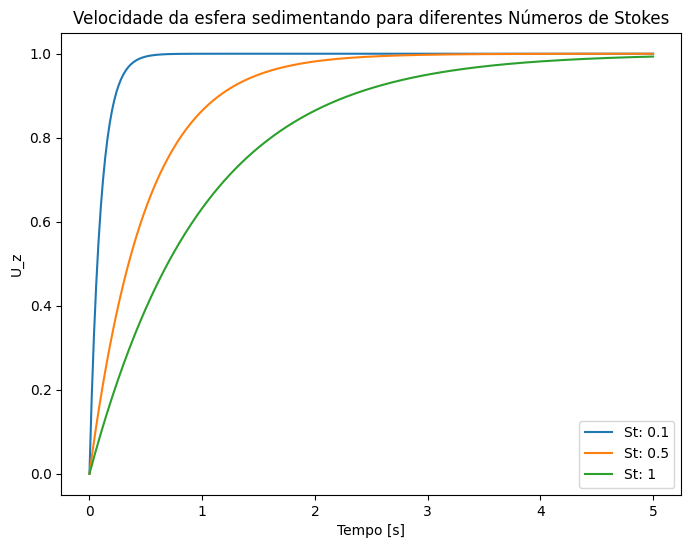

In [80]:
step = 0.01

plt.figure(figsize=(8, 6))
for St in [0.1, 0.5, 1]:
    x = np.arange(0,5+step,step)
    u_z_e = runge_kutta_4_ordem_st(esf_sed_edo_re0,x,u_z_e_init,step,St)
    plt.plot(x,u_z_e,label='St: '+ str(St))
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("U_z")
plt.title("Velocidade da esfera sedimentando para diferentes Números de Stokes")
plt.show()

## Questão 2

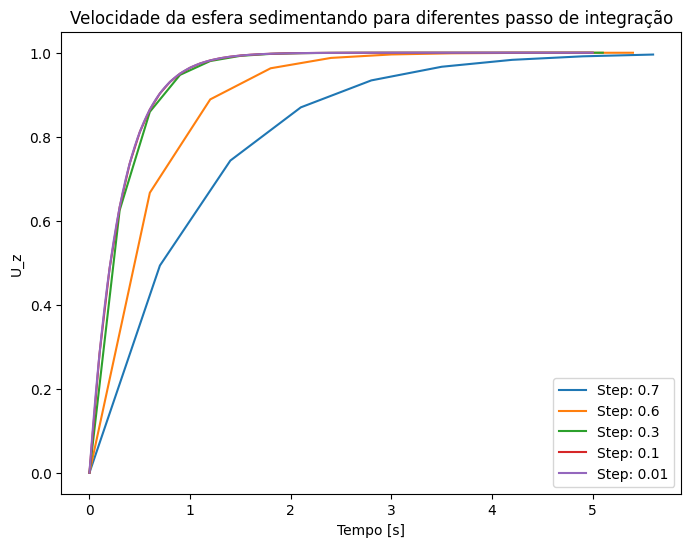

In [81]:
St = 0.3 # Assumindo St = 1 como cenário

plt.figure(figsize=(8, 6))
for step in [0.7, 0.6, 0.3, 0.1, 0.01]:
    x = np.arange(0,5+step,step)
    u_z_e = runge_kutta_4_ordem_st(esf_sed_edo_re0,x,u_z_e_init,step,St)
    plt.plot(x,u_z_e,label='Step: '+ str(step))
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("U_z")
plt.title("Velocidade da esfera sedimentando para diferentes passo de integração")
plt.show()

## Questão 3

Partindo da equação governante dada por:

$m_p\frac{dv_z}{dt} = -6\pi\eta a v_z - \frac{9}{4} \pi \rho_f a^2 v^2_z + \frac{4\pi a^3}{3} \Delta \rho g $


Fazendo:

$ U_z^* = v_z/U_s $ e $ t^* = t U_s/a $, em que $U_s$ é a velocidade de Stokes

Tem-se:


$ \frac{m_p U_s^2}{a} \frac{dU_z^*}{dt^*} = -6\pi\eta a U_z^* U_ - \frac{9}{4}\pi \rho_f a^2 U_z^2 U_s^{*2} + \frac{4\pi a^3}{3} \Delta \rho g $


Dividindo os dois lados por $ 6 \pi \eta a$, tendo Número de Stokes definido como $St = \frac{m_p U_s^2}{6 \pi \eta a^2} $, obtem-se:

$ St \frac{dU_z^*}{dt^*} =  - U_z^* - \frac{3}{8} \frac{\rho_f U_s a}{ \eta}U_z^{*2} + 1$

Como o número de Reynolds é $ Re = \frac{\rho_f U_s a}{ \eta} $, temos:

$ St \frac{dU_z^*}{dt^*} =  - U_z^* - \frac{3}{8} Re U_z^{*2} + 1$

Assim, a equação acima se equivale a equação 16 de [1].


## Questão 4


## Questão 5



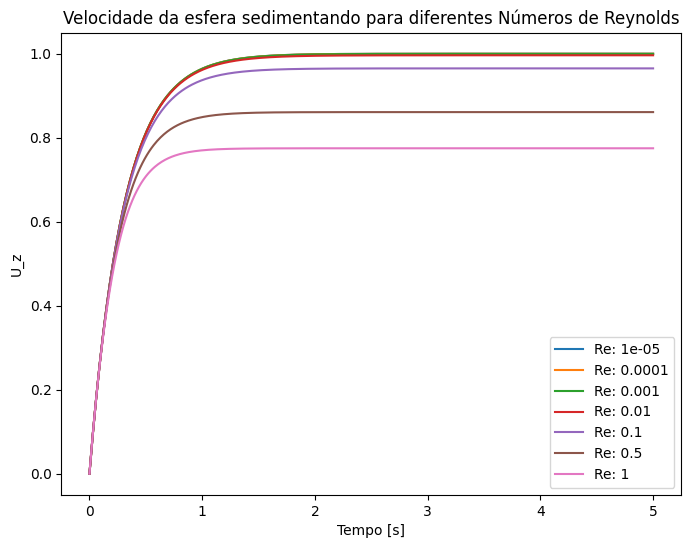

In [82]:
St = 0.3 # Assumindo St = 1 como cenário
step = 0.01
plt.figure(figsize=(8, 6))
for Re in [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]:
    x = np.arange(0,5+step,step)
    u_z_e = runge_kutta_4_ordem_st_re(esf_sed_edo_iner,x,u_z_e_init,step,St,Re)
    plt.plot(x,u_z_e,label='Re: '+ str(Re))
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("U_z")
plt.title("Velocidade da esfera sedimentando para diferentes Números de Reynolds")
plt.show()

# Referências Bibliográficas
[1]  Sobral, Y. D., T. F. Oliveira, and F. R. Cunha. “On the unsteady forces during the motion
of a sedimenting particle.” Powder Technology 178.2 (2007): 129-141.
